<font size=5>   Logistic Regression with a Neural Network mindset——具有神经网络思维的逻辑回归

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [27]:
# 加载数据集
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y =  [1] , it's a ' cat ' picture.


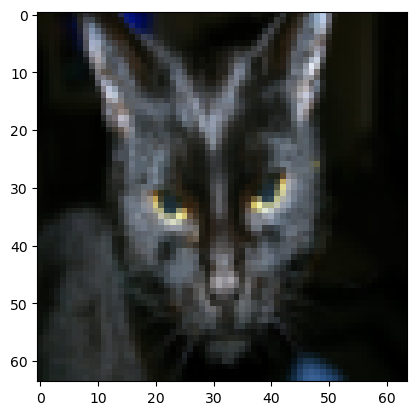

In [28]:
# 确定待处理的图片索引
index = 25
# 显示待处理的图片
plt.imshow(train_set_x_orig[index])
# 输出该图片对应的标签和类别信息
print("y = ", str(train_set_y[:, index]), ", it's a '", classes[np.squeeze(train_set_y[:, index])].decode("utf-8"),"' picture.")
# 显示处理完的图片
plt.show()

In [29]:
# 计算训练集大小
m_train = train_set_y.shape[1]
# 计算测试集大小
m_test = test_set_y.shape[1]
# 获取每个图像的像素数
num_px = train_set_x_orig.shape[1]

# 输出训练集大小
print("Number of training examples: m_train = ", str(m_train))
# 输出测试集大小
print("Number of testing examples: m_test = ", str(m_test))
# 输出每个图像的像素数
print("Height/Width of each image: num_px = ", str(num_px))
# 输出每个图像的大小，包括通道数
print("Each image is of size: (", str(num_px), ", ", str(num_px), ", 3)")
# 输出训练集的图像数据形状
print("train_set_x shape: ", str(train_set_x_orig.shape))
# 输出训练集的标签形状
print("train_set_y shape: ", str(train_set_y.shape))
# 输出测试集的图像数据形状
print("test_set_x shape: ", str(test_set_x_orig.shape))
# 输出测试集的标签形状
print("test_set_y shape: ", str(test_set_y.shape))

Number of training examples: m_train =  209
Number of testing examples: m_test =  50
Height/Width of each image: num_px =  64
Each image is of size: ( 64 ,  64 , 3)
train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (1, 209)
test_set_x shape:  (50, 64, 64, 3)
test_set_y shape:  (1, 50)


In [30]:
# 将训练集图片数据展平成二维数组，每个样本为一行，-1表示自动计算列数
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
# 将测试集图片数据展平成二维数组，每个样本为一行，-1表示自动计算列数
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# 打印训练集和测试集数据的形状
print("train_set_x_flatten shape: ", str(train_set_x_flatten.shape))
print("train_set_y shape: ", str(train_set_y.shape))
print("test_set_x_flatten shape: ", str(test_set_x_flatten.shape))
print("test_set_y shape: ", str(test_set_y.shape))
# 打印前5个样本的像素值
print("sanity check after reshaping: ", str(train_set_x_flatten[0:5, 0]))

train_set_x_flatten shape:  (12288, 209)
train_set_y shape:  (1, 209)
test_set_x_flatten shape:  (12288, 50)
test_set_y shape:  (1, 50)
sanity check after reshaping:  [17 31 56 22 33]


In [31]:
# 将像素值压缩到0-1之间，方便模型训练
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [32]:
def sigmoid(z):  # 定义sigmoid函数，用于计算逻辑回归模型的激活值
    s=1/(1+np.exp(-z))
    return s

In [33]:
# 打印sigmoid函数在0和9.2处的值
print("sigmoid(0) = "+str(sigmoid(0)))
print("sigmoid(9.2) = "+str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [34]:
def initialize_with_zeros(dim):
    # 初始化权重w和偏置b，将w初始化为一个dim行1列的全零矩阵，b初始化为0
    w = np.zeros(shape=(dim, 1))
    b = 0
    # 确保w的维度是(dim,1)
    assert (w.shape == (dim, 1))
    # 确保b的数据类型是float或int
    assert (isinstance(b, float) or isinstance(b, int))
    # 返回w和b
    return w, b

In [35]:
# 初始化维度为2的权重和偏置
dim = 2
w, b = initialize_with_zeros(dim)
print("w = ", str(w))
print("b = ", str(b))

w =  [[0.]
 [0.]]
b =  0


In [36]:
def propagate(w, b, X, Y):   # 神经网络的前向和反向传播，其中输入参数为权重w、偏置b、训练数据X和真实标签Y
    # m表示样本数
    m = X.shape[1]
    # A表示经过sigmoid激活函数后的预测结果
    A = sigmoid(np.dot(w.T, X) + b)
    # cost表示损失函数
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    # dw和db分别表示损失函数对w和b的偏导数
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    # 确保dw的形状与w的形状相同
    assert (dw.shape == w.shape)
    # 确保db的数据类型为float
    assert (db.dtype == float)
    # 用np.squeeze来移除张量中的单维度，以确保cost是标量
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    # grads为dw和db的字典
    grads = {"dw": dw,
             "db": db}
    # 输出梯度grads和损失函数cost
    return grads, cost

In [37]:
# 用给出的数据计算梯度和代价
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print("dw = ", str(grads["dw"]))
print("db = ", str(grads["db"]))
print("cost = ", str(cost))

dw =  [[0.99993216]
 [1.99980262]]
db =  0.49993523062470574
cost =  6.000064773192205


In [38]:
# 定义一个优化函数
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    # 初始化存储cost的列表
    costs = []
    # 开始循环迭代num_iterations次
    for i in range(num_iterations):
        # 调用propagate函数来计算梯度和代价(cost)
        grads, cost = propagate(w, b, X, Y)
        # 将梯度值存储在dw和db中
        dw = grads["dw"]
        db = grads["db"]
        # 更新参数w和b
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # 每100次迭代，将当前代价存储在costs中
        if i % 100 == 0:
            costs.append(cost)
        # 如果需要打印代价cost，打印每100次迭代的cost
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    # 将最优w和b值保存在params字典中
    params = {"w": w,
              "b": b}
    # 将最终的梯度值dw和db保存在grads字典中
    grads = {"dw": dw,
             "db": db}
    # 返回训练过程中保存的最优参数params、最终梯度值grads以及costs列表
    return params, grads, costs

In [39]:
#  定义了  optimize()  函数，用于训练模型，返回权重、偏差、损失值等参数
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
#  打印训练完成后得到的权重、偏差、梯度等参数
print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [40]:
# 定义一个预测函数，输入为权重w，偏移量b，特征矩阵X
def predict(w, b, X):
    # 获取特征矩阵的列数
    m = X.shape[1]
    # 初始化预测结果为全0的矩阵
    Y_prediction = np.zeros((1, m))
    # 将权重矩阵w调整为(X的行数,1)的形状
    w = w.reshape(X.shape[0], 1)
    # 计算预测值
    A = sigmoid(np.dot(w.T, X) + b)
    # 根据预测值的大小判断结果为0或1
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    # 确保预测结果形状正确
    assert (Y_prediction.shape == (1, m))
    # 返回预测结果
    return Y_prediction

In [41]:
#  打印使用训练好的模型对  X  进行预测得到的结果
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [42]:
# 定义一个模型，用于训练和测试数据
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # 初始化权重w和偏置量b
    w, b = initialize_with_zeros(X_train.shape[0])
    # 优化模型参数
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # 更新权重w和偏置量b
    w = parameters["w"]
    b = parameters["b"]
    # 预测训练数据和测试数据的准确率
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    # 将参数和结果保存到字典中
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

In [43]:
#  定义了一个深度学习模型  model()，用于训练和测试数据，并返回训练和测试的结果
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007


Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


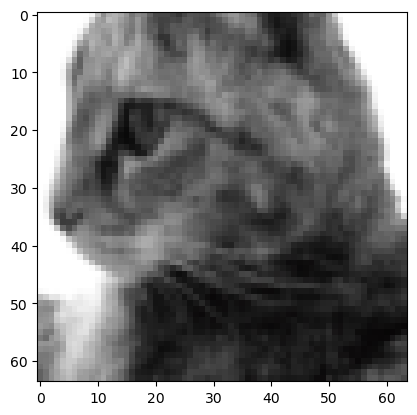

y = 1, you predicted that it is a "cat" picture.


In [44]:
# 设置index的值为5
index = 23
# 展示test_set_x中第index列图片，大小为num_px*num_px*3
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
# 将d["Y_prediction_test"]转换为整型
d["Y_prediction_test"] = d["Y_prediction_test"].astype(int)
# 显示图片
plt.show()
# 打印出实际标签值和预测值之间的差异
print ("y = "+ str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0, index]].decode("utf-8") +  "\" picture.")

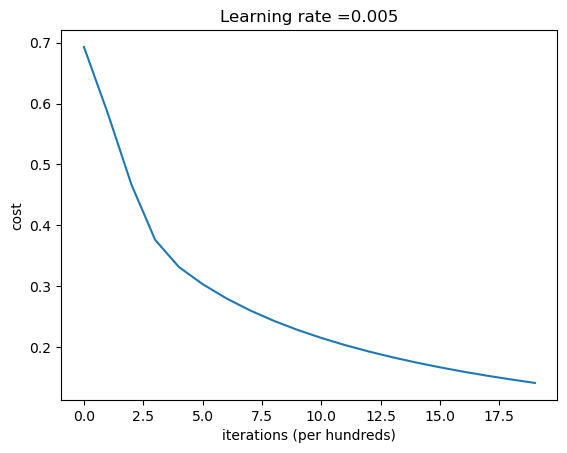

In [45]:
# 获取代价数组并转换为向量
costs = np.squeeze(d['costs'])
# 绘制代价随迭代次数的变化曲线
plt.plot(costs)
# 设置纵坐标标签为'cost'
plt.ylabel('cost')
# 设置横坐标标签为'iterations (per hundreds)'
plt.xlabel('iterations (per hundreds)')
# 设置标题为'Learning rate = xx'
plt.title("Learning rate =" + str(d["learning_rate"]))
# 显示图像
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



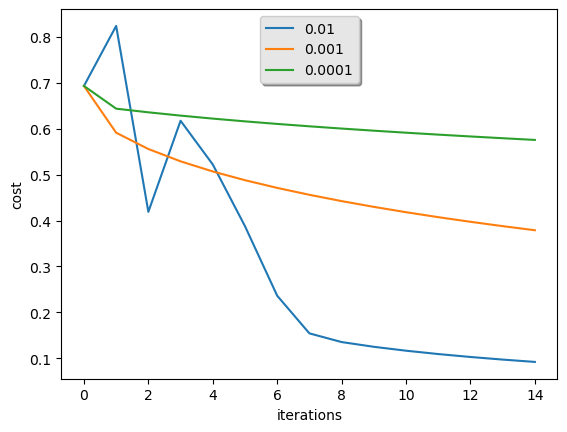

In [46]:
# 学习率列表
learning_rates = [0.01, 0.001, 0.0001]
# 模型字典
models = {}
for i in learning_rates:  # 使用不同学习率训练模型，并存储到模型字典中
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print('\n' + "-------------------------------------------------------" + '\n')
# 绘制每个模型的训练代价曲线
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
# 设置x,y轴标签
plt.ylabel('cost')
plt.xlabel('iterations')
# 生成图例
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()  # 获取图例框架
frame.set_facecolor('0.90')  # 设置图例框架颜色
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


C:\Users\12516\AppData\Local\Temp\ipykernel_6816\3246719277.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(fname))


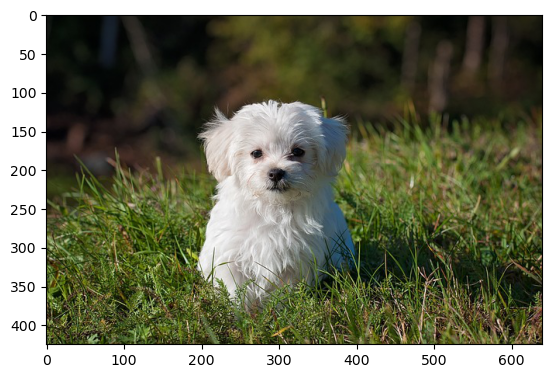

In [49]:
import imageio  # 导入imageio

my_image = "my_image2.jpg"  # 定义要获取的图片路径和名称
fname = my_image # 将图片路径和名称赋值给fname
image = np.array(imageio.imread(fname)) 

from PIL import Image  # 导入PIL中的Image类
im = Image.fromarray(image)  # 根据numpy数组创建Image对象
im_resized = im.resize((num_px, num_px))  # 调整Image对象的大小
my_image = np.array(im_resized).reshape((1, num_px * num_px * 3)).T  # 将Image对象转换为numpy数组并拉成一维数组
my_predicted_image = predict(d["w"], d["b"], my_image)  # 利用已训练好的模型预测图片类别

plt.imshow(image)  # 显示原图
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")  # 打印预测结果并解码结果数组
plt.show()

In [48]:
d

{'costs': [0.6931471805599453,
  0.5845083636993086,
  0.46694904094655476,
  0.37600686694802077,
  0.3314632893282513,
  0.30327306747438293,
  0.2798795865826048,
  0.26004213692587574,
  0.24294068467796623,
  0.22800422256726066,
  0.21481951378449635,
  0.20307819060644985,
  0.1925442771670686,
  0.18303333796883503,
  0.17439859438448876,
  0.16652139705400335,
  0.15930451829756614,
  0.15266732471296504,
  0.1465422350398234,
  0.14087207570310162],
 'Y_prediction_test': array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
         0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
         1, 0, 0, 1, 1, 0]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 0., 0., 